<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Anomaly Detection

Name : Rahaf Hosari

## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)
from sklearn import set_config
set_config(transform_output='pandas')

In [4]:
path = '/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Anomaly Detection/credit_card.csv'
df = pd.read_csv(path)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Dtype  
---  ------  -----  
 0   V1      float64
 1   V2      float64
 2   V3      float64
 3   V4      float64
 4   V5      float64
 5   V6      float64
 6   V7      float64
 7   V8      float64
 8   V9      float64
 9   V10     float64
 10  V11     float64
 11  V12     float64
 12  V13     float64
 13  V14     float64
 14  V15     float64
 15  V16     float64
 16  V17     float64
 17  V18     float64
 18  V19     float64
 19  V20     float64
 20  V21     float64
 21  V22     float64
 22  V23     float64
 23  V24     float64
 24  V25     float64
 25  V26     float64
 26  V27     float64
 27  V28     float64
 28  Amount  float64
dtypes: float64(29)
memory usage: 2.2 MB


In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.254287,0.283266,0.919481,0.290123,-0.060268,0.119328,-0.068060,-0.065865,0.812108,-0.223647,0.769849,-1.298310,0.872823,0.708863,-0.148200,-0.013843,0.336903,-0.019875,-0.070028,0.030729,-0.057396,-0.158022,-0.030401,0.017295,0.085811,0.107121,0.006845,0.003067,64.520252
std,1.522637,1.314546,1.163288,1.427511,1.173778,1.299279,1.078250,1.255474,1.166215,1.099040,1.166212,1.523035,1.214494,1.241706,0.982085,0.882710,0.967641,0.794102,0.809517,0.595192,0.907699,0.631906,0.489834,0.591947,0.430758,0.556106,0.404949,0.267988,185.221202
min,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000
25%,-1.027537,-0.214263,0.424669,-0.589896,-0.645458,-0.633723,-0.535728,-0.192522,0.072521,-0.688422,-0.049507,-2.382661,0.011629,0.081149,-0.733039,-0.502403,-0.159532,-0.454213,-0.557802,-0.149775,-0.271001,-0.555175,-0.172704,-0.329963,-0.162928,-0.325964,-0.083980,-0.015625,5.380000
50%,-0.383856,0.292181,0.954225,0.235755,-0.156229,-0.160367,-0.052060,0.011440,0.815950,-0.340435,0.748672,-1.652614,0.949446,0.922855,-0.031137,0.062081,0.313472,0.017186,-0.084979,-0.020913,-0.128229,-0.145288,-0.044523,0.078389,0.118709,0.040788,-0.004320,0.016480,15.950000
75%,1.146465,0.913810,1.611713,1.138298,0.359786,0.489572,0.472143,0.264272,1.517105,0.170406,1.572927,0.065777,1.786078,1.499980,0.519083,0.537378,0.797031,0.445202,0.448598,0.160834,0.031776,0.238299,0.084179,0.407717,0.360469,0.467256,0.118735,0.078644,53.175000
max,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000


#EDA

In [8]:
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

#Scaling Data

In [10]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,-1.133169,0.446834,-1.535047,-0.821518,1.645946,-0.517249,-0.133250,0.057508,0.585590,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,0.722785,1.551943,-0.315973,-0.686699,0.798096,0.541269,-0.466837,-0.205886,-0.093585,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,-0.124638,0.895884,-0.128068,-0.704557,2.539689,-3.258583,0.798958,-0.127804,-2.707713,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,-0.854378,0.969520,-0.300606,-0.802796,-0.492057,-1.184825,-1.055192,2.500622,-1.436230,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,-1.365765,1.205880,0.389505,-1.472671,0.329236,-0.495778,-0.593159,-0.023071,1.079111,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532


#KMeans Cluster
Fit a KMeans model to create 3 clusters.  Please use a random state of 42 for your model.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [44]:
df_scaled['cluster'] = kmeans.predict(df_scaled)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,-1.133169,0.446834,-1.535047,-0.821518,1.645946,-0.517249,-0.133250,0.057508,0.585590,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472,1
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,0.722785,1.551943,-0.315973,-0.686699,0.798096,0.541269,-0.466837,-0.205886,-0.093585,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835,1
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,-0.124638,0.895884,-0.128068,-0.704557,2.539689,-3.258583,0.798958,-0.127804,-2.707713,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110,1
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,-0.854378,0.969520,-0.300606,-0.802796,-0.492057,-1.184825,-1.055192,2.500622,-1.436230,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445,1
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,-1.365765,1.205880,0.389505,-1.472671,0.329236,-0.495778,-0.593159,-0.023071,1.079111,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532,1


In [40]:
# Plot the data points and identified clusters
# fig, ax = plt.subplots()
# ax.scatter(df_scaled, c=df_scaled["cluster"], ec="black", lw=0.5, cmap="rainbow")
# ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters");

Use scipy.spatial.distance.cdist to create a matrix of distances between each data point and each cluster center

In [60]:
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(df_scaled, kmeans.cluster_centers_, 'euclidean')

In [46]:
# Distances shape is (# rows, # clusters)
distances.shape

(10000, 3)

In [47]:
# Compare to X (#rows, # features)
df_scaled.shape

(10000, 30)

In [48]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head()

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,4.406668,2.931322,21.151824
1,3.653050,2.595633,20.356396
2,7.377618,6.629868,21.568111
3,5.685835,4.811109,21.240903
4,4.508728,3.379034,20.938516


Define a list of the indices of the anomalous data using the threshold given by the stakeholder (99.6% valid).

In [49]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]

array([2.93132175, 2.59563263, 6.62986814, 4.8111086 , 3.37903386])

In [50]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 99.6)
threshold

19.441433856345554

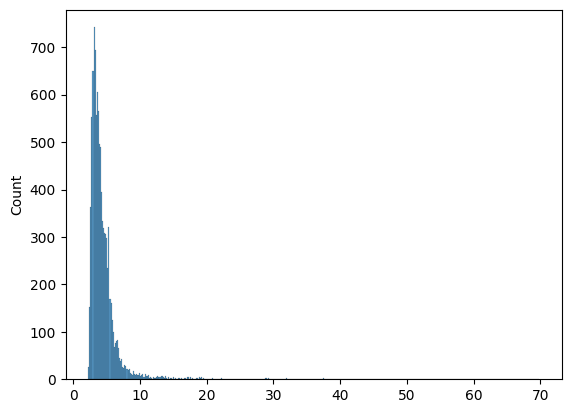

In [51]:
# distance from closet centroid
ax = sns.histplot(min_distances)

> From the Historgram above Outliers do exist

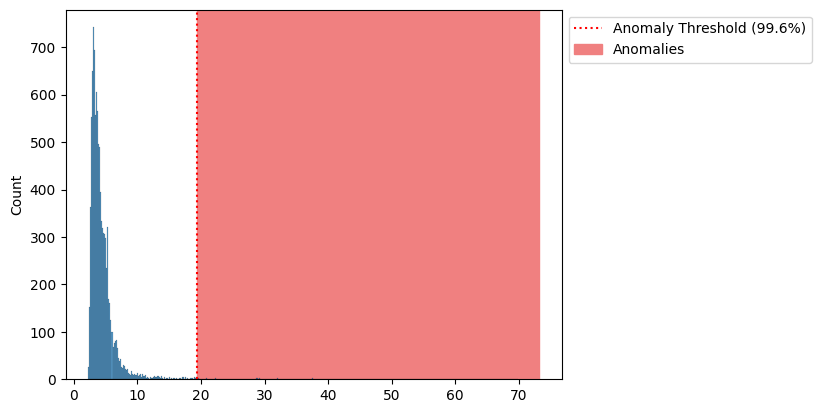

In [52]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (99.6%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

Identify Points That Are Anomalies

In [53]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

40

Which Rows are the Anomaly

In [54]:
# Getting the row indices of the anomalies
idx_anomalies = df_scaled[filter_anomalies].index
idx_anomalies

Index([ 159, 1376, 1619, 2156, 2212, 2439, 2594, 2654, 2756, 2858, 2911, 2914,
       2917, 2923, 3057, 3443, 4779, 5303, 5412, 5413, 5529, 5674, 5704, 5764,
       6175, 6489, 6643, 6672, 7130, 7273, 7322, 7338, 7453, 7462, 7470, 7596,
       7597, 8163, 8437, 8939],
      dtype='int64')

In [55]:
# Slicing the anomalies from X (for demonstration)
df_scaled.iloc[idx_anomalies]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
159,-3.834960,-9.431468,-5.686284,2.104654,-1.153193,3.584223,4.522820,-0.129306,-1.147362,-1.366035,-0.971285,1.040386,-0.317010,0.443842,0.823397,0.531465,-0.862498,1.022771,-1.122225,12.960326,2.518824,-3.332963,-7.192555,2.023902,-1.141962,-1.367622,-1.773317,2.499616,20.320071,1
1376,-2.418627,-3.007869,-2.040269,1.407855,-8.255103,4.877629,10.065097,-1.668099,-0.900585,-0.710429,-0.933227,-0.448552,-1.440443,-1.453373,1.303724,1.877587,-1.230779,-0.183323,-0.915106,-3.754280,-1.015485,1.764920,5.047600,0.394163,0.499370,1.889565,3.994384,-6.126389,12.890690,1
1619,-7.150070,-7.528445,-11.441444,4.009433,-27.290908,16.374319,31.878466,-5.938228,-2.347745,-2.195640,2.514530,-0.357690,1.279856,-1.902074,3.852449,4.646881,-2.058505,-1.093783,1.015847,-19.791952,-5.125945,2.412080,-5.911458,1.395896,1.533320,1.248504,9.496001,15.504724,41.292747,1
2156,-3.674689,-9.158175,-3.656015,2.370064,-3.748184,0.415459,4.262012,-0.732546,-0.492485,-1.483717,-1.212926,0.933604,-0.708696,0.116644,1.129175,0.712448,-0.406408,0.674243,-1.411297,12.238043,2.443958,-2.902722,-6.553469,1.000686,-2.487275,-0.031340,-1.778584,2.425582,19.461379,1
2212,-3.215208,3.026652,-1.687193,-2.215652,-0.775564,1.476574,-4.085387,-11.810305,0.773002,0.285954,0.584726,2.037797,-2.106236,0.482640,0.478011,-0.855557,0.894265,0.266580,0.336464,-5.487786,16.278911,-6.764131,4.300451,-0.071619,-0.100710,-0.275131,1.512629,1.061451,-0.326762,1
2439,-7.824911,-12.184466,-1.114101,2.453688,9.132442,-5.838093,-6.342982,1.306016,-0.646520,-0.180378,0.226978,2.269757,-0.401795,0.707069,-0.007378,-0.430741,0.179731,-0.494607,-1.269910,7.457408,1.892358,-1.190891,0.083439,-0.193509,-0.965160,0.213631,0.481461,-8.850109,0.299547,1
2594,-1.524177,-2.246208,-3.438370,1.228373,-9.675750,5.977763,11.396173,-1.403798,-1.962029,-1.585241,0.016495,0.746917,0.873895,-0.755322,1.880003,1.633457,-1.608488,1.988047,2.116557,1.340186,-0.064103,0.668031,4.593911,-1.331986,0.138431,-0.625159,2.898280,-2.338725,15.363209,1
2654,-4.789278,2.105598,-1.241513,0.500971,0.085842,2.026108,-5.749739,-15.222733,0.203976,0.678419,-0.916013,1.914899,-1.816517,-0.010251,-0.301824,-0.501598,1.207208,-1.025966,-0.662560,-6.412602,10.683389,-4.582514,5.469079,0.696040,0.498896,-0.683721,3.195176,-2.405010,-0.186922,1
2756,-6.913533,-7.777855,0.673923,1.964941,6.806898,-3.195860,-8.233600,-4.009462,1.273875,-0.009641,-1.048503,2.254194,-0.511892,-1.097861,-0.253083,0.208405,0.393092,-2.235378,-0.330877,-8.166138,-4.784251,2.834458,-1.390803,1.062015,-1.474357,1.074814,8.311982,-4.891511,0.110575,1
2858,-2.794147,3.627035,-2.608324,-0.017060,1.127610,0.273505,-3.372254,-10.038721,-0.401403,-0.410035,0.189850,1.395440,-0.910701,-3.059111,0.419215,0.929158,3.635937,1.260561,-2.628348,-4.376623,13.498816,-6.502582,1.083887,-0.199768,-0.816617,-1.043062,2.590559,1.872770,-0.335995,1


Note that you cannot visualize your clusters since this dataset has 29 features. (To visualize, you could apply PCA to reduce the dimensionality to 2 features, but visualization is not required.)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

In [58]:
df_pca.head()

,pca0,pca1,pca2
0,2.312919,-0.935102,0.886888
1,1.544762,0.568216,-0.898455
2,2.413325,-1.564232,0.839665
3,1.920967,-0.480201,-0.247928
4,1.993982,-0.948647,0.944274


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


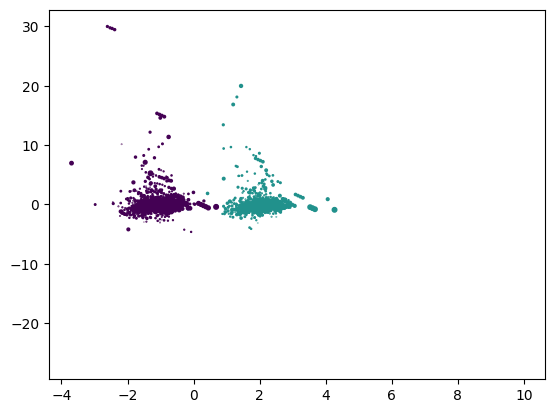

In [61]:
plt.scatter(df_pca['pca0'], df_pca['pca1'],df_pca['pca2'], c=kmeans.labels_)

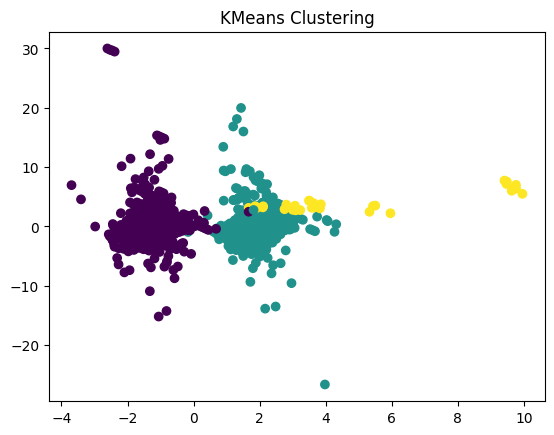

In [62]:
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=kmeans.labels_)
plt.title('KMeans Clustering');